<a href="https://colab.research.google.com/github/soulqan/Machine_Learning_2025/blob/main/UTS_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Soultan Mohammad Agnar Bisyarah (28)

NIM: 2341720191

Kelas: TI 3H

# Pre-Processing

In [45]:
!pip install annoy

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551520 sha256=50f3569f1629a0730869d3fda024c546c6746f457f4474f7ceedf0045d5ae04d
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [11]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soultanmohammadab","key":"a2276767643510016b46723eb5a44171"}'}

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip /content/house-prices-advanced-regression-techniques.zip -d /content/houseprice

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 651MB/s]
Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: /content/houseprice/data_description.txt  
  inflating: /content/houseprice/sample_submission.csv  
  inflating: /content/houseprice/test.csv  
  inflating: /content/houseprice/train.csv  


In [52]:
# Load dataset
df = pd.read_csv('/content/houseprice/train.csv')

# Lihat ukuran dan info awal dataset
print("Ukuran dataset:", df.shape)
df.info()

Ukuran dataset: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-n

In [53]:
# Pilih fitur numerik
num_df = df.select_dtypes(include=['float64', 'int64'])
print("Jumlah fitur numerik:", num_df.shape[1])

# Lihat sebagian data
num_df.head()


Jumlah fitur numerik: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [54]:
print("Jumlah missing values per kolom:")
print(num_df.isnull().sum().sort_values(ascending=False).head(10))

num_df = num_df.fillna(num_df.mean())


Jumlah missing values per kolom:
LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
LotArea           0
MSSubClass        0
Id                0
OverallCond       0
OverallQual       0
YearRemodAdd      0
YearBuilt         0
dtype: int64


In [55]:
num_df['TotalArea'] = num_df['GrLivArea'] + num_df['TotalBsmtSF']

num_df[['GrLivArea', 'TotalBsmtSF', 'TotalArea']].head()

,GrLivArea,TotalBsmtSF,TotalArea
0,1710,856,2566
1,1262,1262,2524
2,1786,920,2706
3,1717,756,2473
4,2198,1145,3343


In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

print("Ukuran data setelah normalisasi:", X_scaled.shape)


Ukuran data setelah normalisasi: (1460, 39)


In [56]:
# Ubah ke DataFrame biar bisa dicek
X_df = pd.DataFrame(X_scaled, columns=num_df.columns)
X_df.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalArea
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,-0.008372
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,-0.059386
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,0.161672
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281,-0.121330
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843,0.935372


# Clustering

**Kmeans**

In [35]:
# Tentukan jumlah cluster (misal 5)
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Evaluasi hasil K-Means
sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
dbi_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)

print("=== HASIL K-MEANS ===")
print(f"Silhouette Score: {sil_kmeans:.4f}")
print(f"Davies–Bouldin Index: {dbi_kmeans:.4f}")

=== HASIL K-MEANS ===
Silhouette Score: 0.1198
Davies–Bouldin Index: 2.4615


**DBSCAN**

In [36]:
# Terapkan DBSCAN (parameter bisa disesuaikan)
dbscan = DBSCAN(eps=2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Cek jumlah cluster dan noise
unique_labels = set(labels_dbscan)
print(f"\nJumlah cluster terdeteksi (termasuk noise): {len(unique_labels)}")
print("Label unik:", unique_labels)

# Evaluasi hasil DBSCAN (kalau bukan semua noise)
if len(set(labels_dbscan)) > 1:
    sil_dbscan = silhouette_score(X_scaled, labels_dbscan)
    dbi_dbscan = davies_bouldin_score(X_scaled, labels_dbscan)
    print("\n=== HASIL DBSCAN ===")
    print(f"Silhouette Score: {sil_dbscan:.4f}")
    print(f"Davies–Bouldin Index: {dbi_dbscan:.4f}")
else:
    sil_dbscan, dbi_dbscan = None, None
    print("DBSCAN tidak bisa dievaluasi (semua data dianggap noise).")



Jumlah cluster terdeteksi (termasuk noise): 5
Label unik: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(-1)}

=== HASIL DBSCAN ===
Silhouette Score: -0.2145
Davies–Bouldin Index: 1.9376


**Perbandingan Hasil**

In [38]:
print("KMeans Silhouette:", silhouette_score(X_scaled, labels_kmeans))
print("KMeans Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_kmeans))
print("DBSCAN Silhouette:", silhouette_score(X_scaled, labels_dbscan))
print("DBSCAN Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_dbscan))

KMeans Silhouette: 0.11981214325618608
KMeans Davies-Bouldin: 2.4615070588291386
DBSCAN Silhouette: -0.21453432084698354
DBSCAN Davies-Bouldin: 1.9376277314018033


**Table**

In [42]:
hasil_evaluasi = pd.DataFrame({
    'Model': ['KMeans', 'DBSCAN'],
    'Silhouette Score': [silhouette_kmeans, silhouette_dbscan],
    'Davies–Bouldin Index': [dbi_kmeans, dbi_dbscan]
})

print("\n=== PERBANDINGAN HASIL CLUSTERING ===")
print(hasil_evaluasi)



=== PERBANDINGAN HASIL CLUSTERING ===
    Model  Silhouette Score  Davies–Bouldin Index
0  KMeans          0.119812              2.461507
1  DBSCAN         -0.214534              1.937628


**visualisasi**

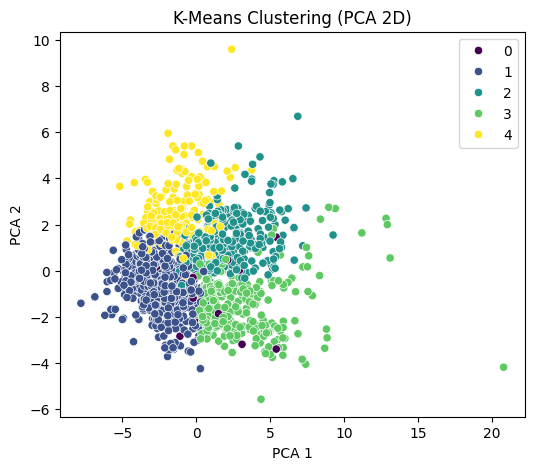

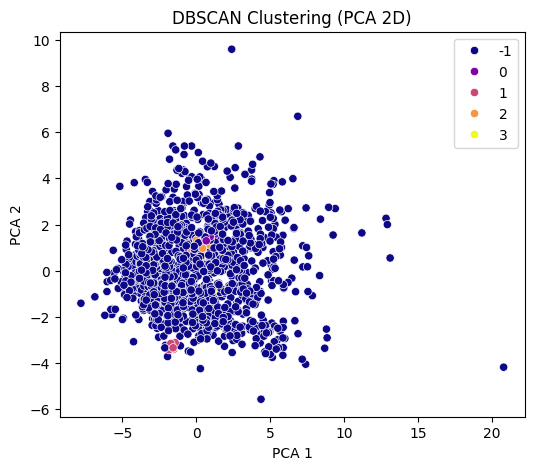

In [43]:
# Reduksi dimensi jadi 2D untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot K-Means
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_kmeans, palette='viridis')
plt.title("K-Means Clustering (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Plot DBSCAN
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_dbscan, palette='plasma')
plt.title("DBSCAN Clustering (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


**ANN**

In [49]:
# Tentukan dimensi data
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

# ======================
# Build index
# ======================
for i, v in enumerate(X_scaled):
    ann.add_item(i, v)

ann.build(10)  # jumlah tree = 10
print("Annoy index berhasil dibangun dengan 10 pohon.")

# ======================
# Pilih query point (misal index ke-42)
# ======================
query_idx = 42

# Dapatkan 5 tetangga terdekat dari titik query
neighbors, distances = ann.get_nns_by_item(query_idx, 5, include_distances=True)

# ======================
# Tampilkan hasil
# ======================
print(f"\nQuery Point Index: {query_idx}")
print("Nearest Neighbors and Distances:")
for n, d in zip(neighbors, distances):
    print(f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster (KMeans): {labels_kmeans[n]}")

Annoy index berhasil dibangun dengan 10 pohon.

Query Point Index: 42
Nearest Neighbors and Distances:
Neighbor Index: 42 | Distance: 0.0000 | Cluster (KMeans): 1
Neighbor Index: 303 | Distance: 3.0500 | Cluster (KMeans): 1
Neighbor Index: 587 | Distance: 3.6170 | Cluster (KMeans): 1
Neighbor Index: 547 | Distance: 3.6941 | Cluster (KMeans): 1
Neighbor Index: 71 | Distance: 3.9207 | Cluster (KMeans): 1
